In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
print("First 5 rows:\n", df.head())

First 5 rows:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

In [ ]:
print("\nDataset shape:", df.shape)


Dataset shape: (569, 31)


In [ ]:
print("\nColumn Names:\n", df.columns)


Column Names:
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [ ]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [ ]:
print("\nTarget Distribution:\n", df['target'].value_counts())


Target Distribution:
 target
1    357
0    212
Name: count, dtype: int64


In [ ]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
        mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000           

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


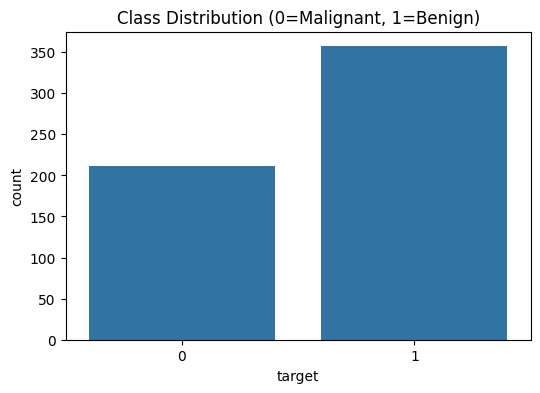

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0=Malignant, 1=Benign)')
plt.show()

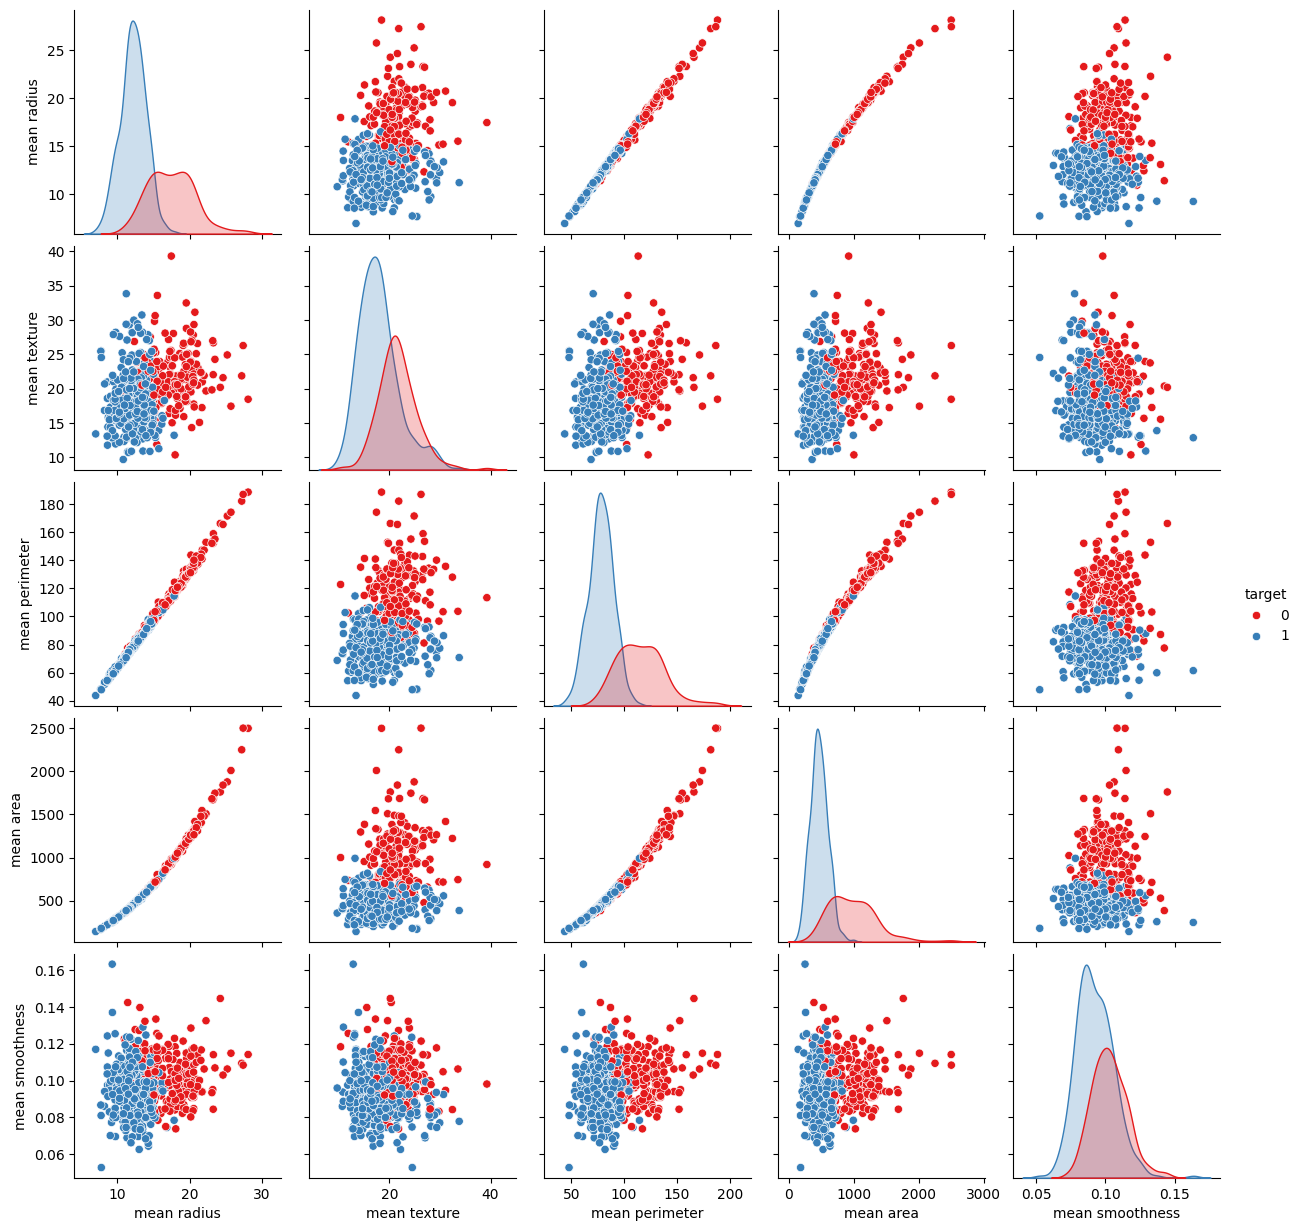

In [ ]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
sns.pairplot(df[selected_features], hue='target', palette='Set1')
plt.show()

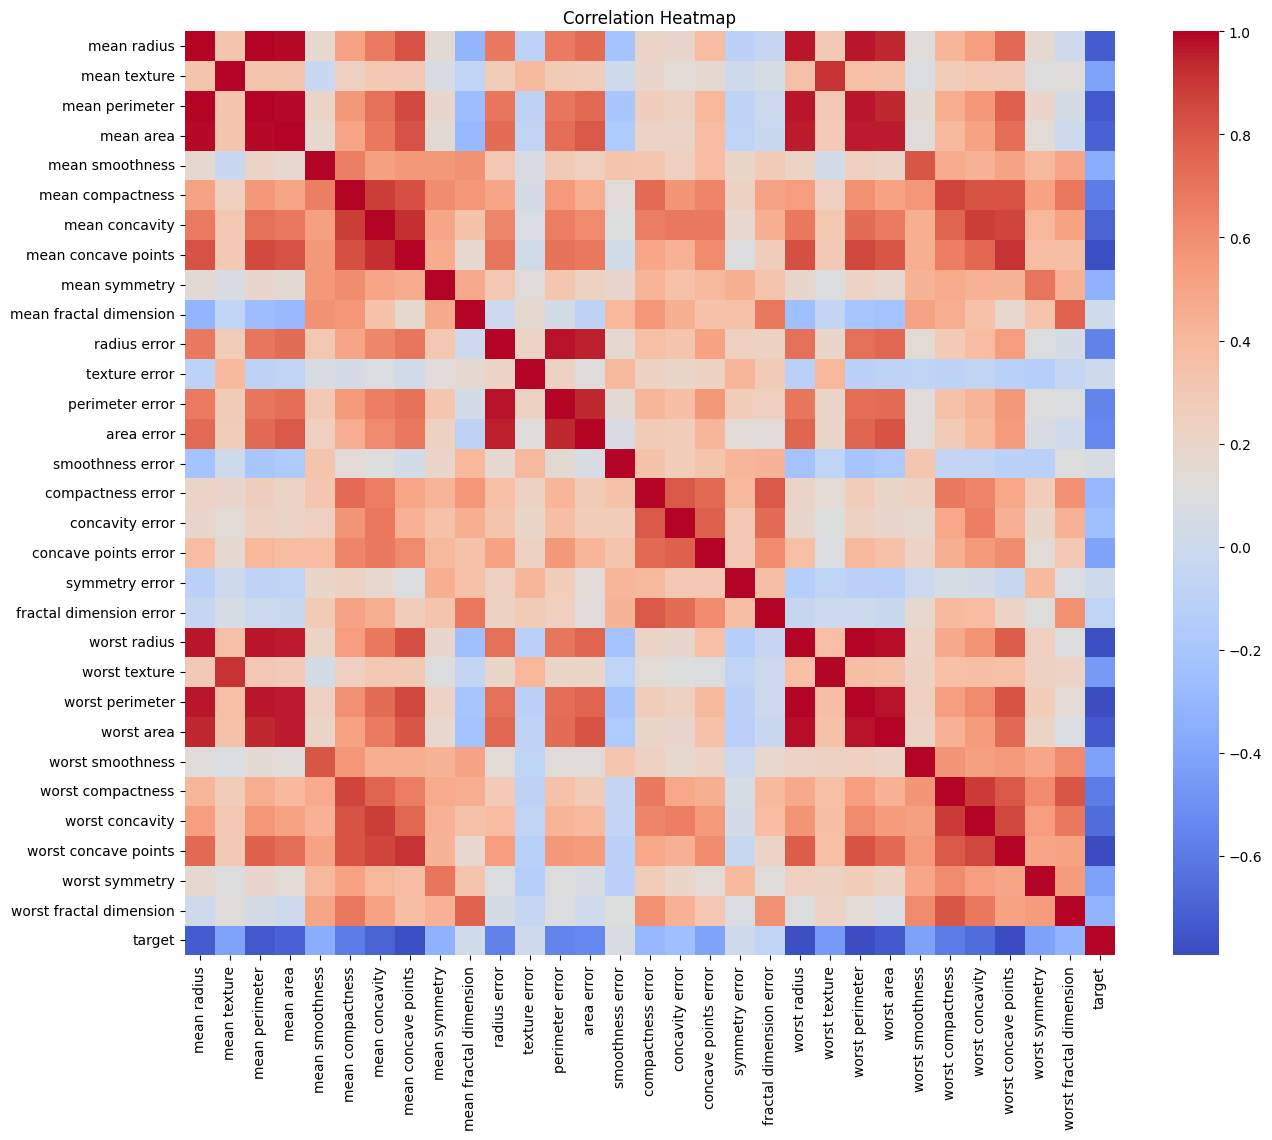

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
target_corr = corr_matrix['target'].sort_values(ascending=False)
print("\nTop features positively correlated with target:\n", target_corr.head(10))
print("\nTop features negatively correlated with target:\n", target_corr.tail(10))



Top features positively correlated with target:
 target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
Name: target, dtype: float64

Top features negatively correlated with target:
 worst concavity        -0.659610
mean concavity         -0.696360
mean area              -0.708984
mean radius            -0.730029
worst area             -0.733825
mean perimeter         -0.742636
worst radius           -0.776454
mean concave points    -0.776614
worst perimeter        -0.782914
worst concave points   -0.793566
Name: target, dtype: float64


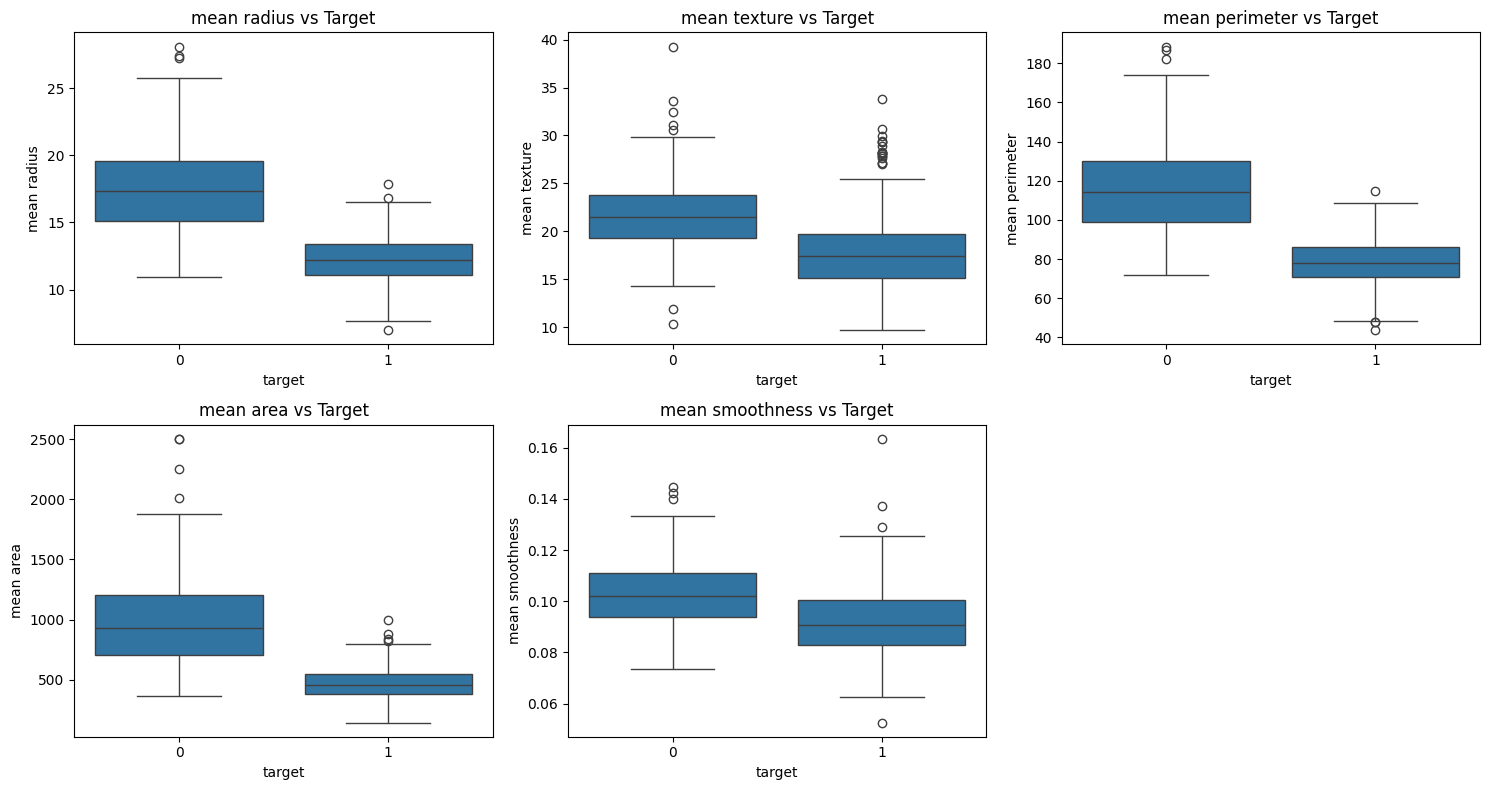

In [ ]:
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
plt.figure(figsize=(15,8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

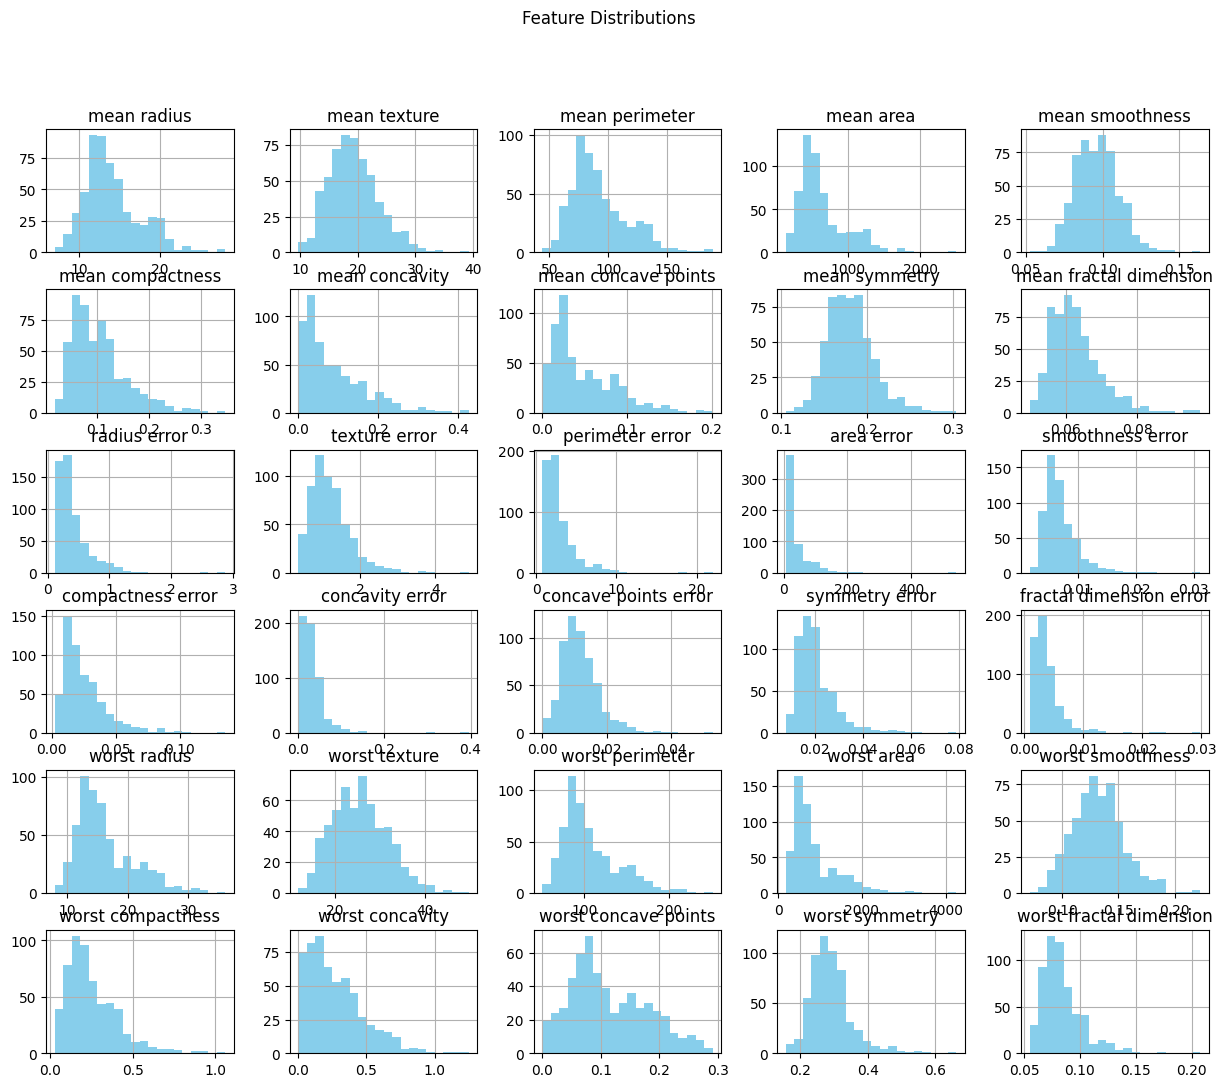

In [ ]:
df.drop('target', axis=1).hist(figsize=(15,12), bins=20, color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

/tmp/ipython-input-1603761730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-1603761730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-1603761730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=feature, data=df, palette='Set2')
/tmp/ipython-input-1603761730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

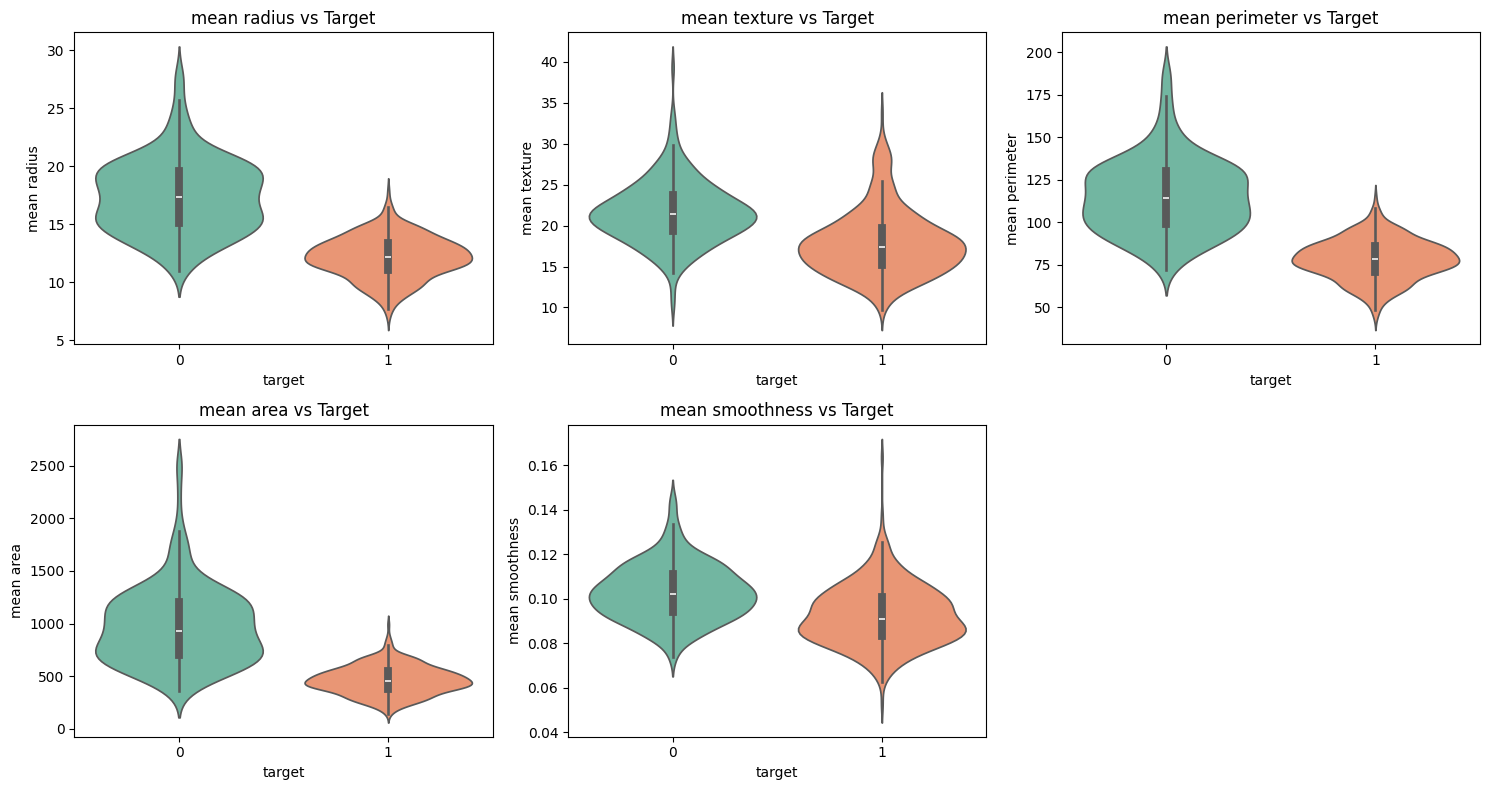

In [ ]:
plt.figure(figsize=(15,8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2,3,i)
    sns.violinplot(x='target', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

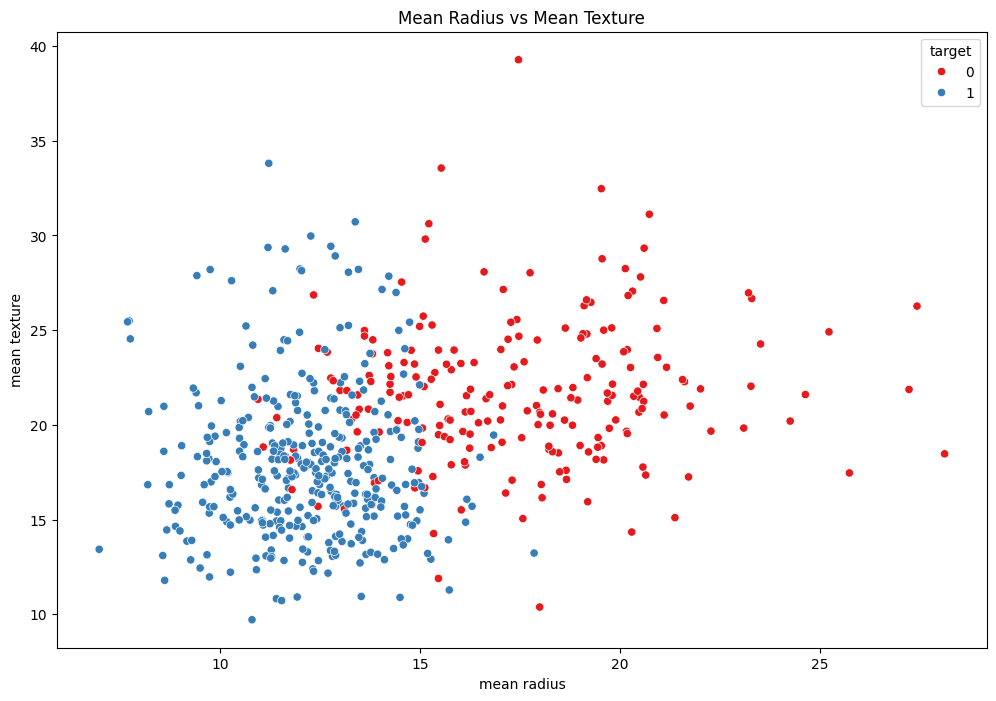

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df, palette='Set1')
plt.title('Mean Radius vs Mean Texture')
plt.show()

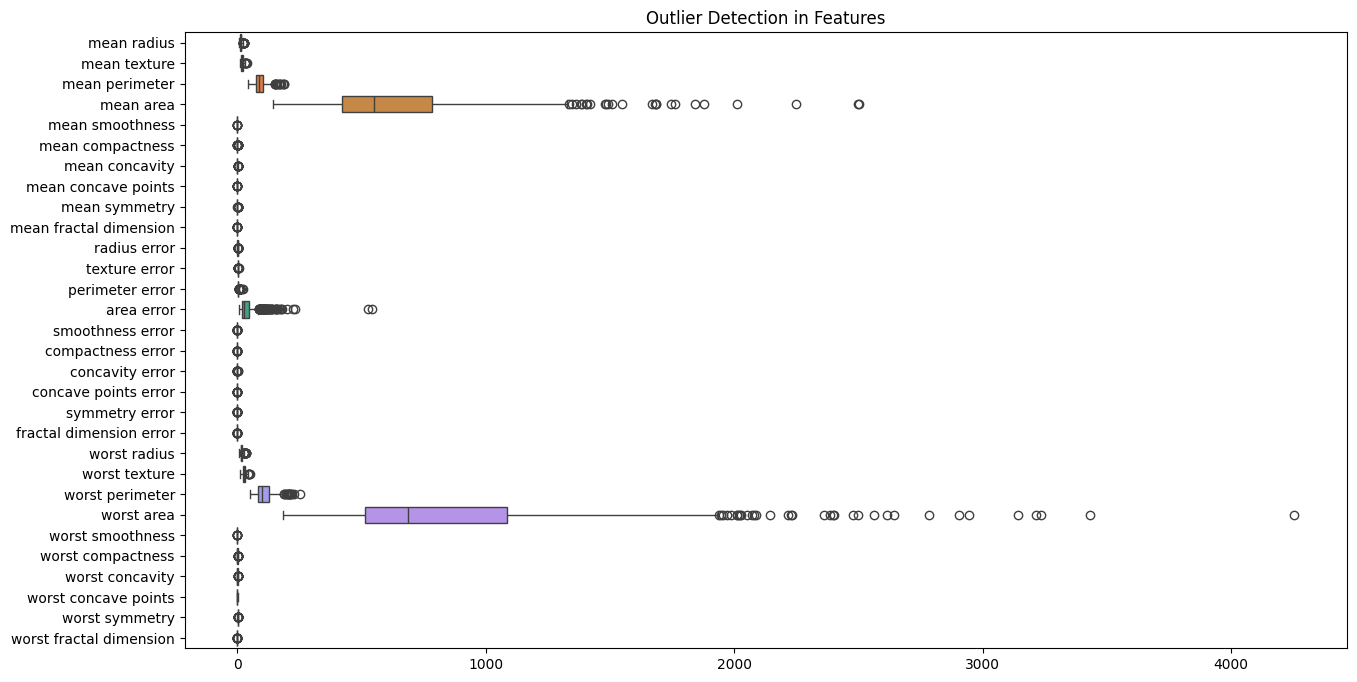

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop('target', axis=1), orient='h')
plt.title('Outlier Detection in Features')
plt.show()

#Feature Engineering

In [ ]:
df_Copy = df.copy()

In [ ]:
f"null values are {df_Copy.isnull().sum().sum()}"

'null values are 0'

In [ ]:
f"duplicated values are {df.duplicated().sum()}"

'duplicated values are 0'

In [ ]:
class Outliers:
  def __init__(self, df):
    self.df = df


  def handling_skewed(self, col):
    self.Q1 = self.df[col].quantile(0.25)
    self.Q3 = self.df[col].quantile(0.75)
    self.IQR = self.Q3 - self.Q1
    self.upper_limit = self.Q3 + 1.5*self.IQR
    self.lower_limit = self.Q1 - 1.5*self.IQR
    self.df[col] = np.where(
        self.df[col] > self.upper_limit, self.upper_limit,
        np.where(self.df[col]< self.lower_limit, self.lower_limit, self.df[col])
    )
    return self.df


  def handling_not_skewed(self, col):
    self.mean = self.df[col].mean()
    self.std = self.df[col].std()
    self.upper_limit = self.mean + 3*self.std
    self.lower_limit = self.mean - 3*self.std
    self.df[col] = np.where(
        self.df[col] > self.upper_limit, self.upper_limit,
        np.where(self.df[col]< self.lower_limit, self.lower_limit, self.df[col])
    )
    return self.df

  def apply_to_all(self, skew_threshold=0.5):
    numeric_cols = self.df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
      skewness = self.df[col].skew()
      if abs(skewness) > skew_threshold:
        self.handling_skewed(col)
      else:
        self.handling_not_skewed(col)
        return self.df


In [ ]:
X = df_Copy.drop('target', axis=1)
y = df_Copy['target']

In [ ]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
PT = PowerTransformer(method='yeo-johnson')
X[numeric_cols] = PT.fit_transform(X[numeric_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
X_top = X[selected_features]

In [ ]:
X_top

,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
0,1.131103,1.252831,1.122890,2.085403,1.725050,1.721107,1.779345,1.923198,1.818481,1.593440,1.776839,1.626693,1.886612,1.692888,1.885949
1,1.603274,1.514501,1.617794,-0.361956,0.363185,0.844984,0.964622,0.740965,1.260354,1.554386,1.413776,1.586318,-0.275111,0.092677,1.096448
2,1.452953,1.442524,1.450119,1.154682,1.348747,1.584966,1.406254,1.203381,1.465715,1.402505,1.309437,1.409184,1.198726,1.004727,1.685873
3,-0.755829,-0.507474,-0.834209,2.114624,1.546061,1.367542,0.813066,0.763982,0.072506,-0.066211,-0.022717,-0.424617,2.201087,1.641002,1.817192
4,1.556533,1.567540,1.580039,0.772924,1.351925,1.357339,1.424661,1.430751,1.469241,1.281714,1.304286,1.297806,-0.108048,0.823857,0.813447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.760992,1.725771,1.801434,0.481862,1.555381,1.667409,1.830244,1.816377,1.839948,1.600336,1.526192,1.631697,-0.053681,0.863971,1.479080
565,1.529376,1.472599,1.531696,0.233913,0.991952,1.280810,1.437482,1.374296,1.507296,1.415967,1.351706,1.426337,-0.222923,0.497060,0.817229
566,0.830968,0.814155,0.837465,0.210578,0.441856,0.456918,0.669511,0.754248,0.830942,0.775192,0.791378,0.800925,0.640288,0.580954,0.540889
567,1.608223,1.683375,1.537151,2.082545,1.830329,1.750403,1.373798,1.504318,1.393832,1.628552,1.776839,1.493542,2.203270,2.074052,1.882513


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9824561403508771
Precision: 0.9859154929577465
Recall: 0.9859154929577465
